In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import rc
from scipy import optimize
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

sns.set()
%matplotlib inline

In [2]:
data = pd.read_csv(
    "https://web.stanford.edu/~hastie/ElemStatLearn/datasets/prostate.data",
    sep='\t', index_col=0,
)

In [3]:
data = data[data['train'] == 'T']
X = data.drop(columns=['lpsa', 'train']).astype(float)
y = data['lpsa'].astype(float)

In [4]:
scaler = StandardScaler()
X = pd.DataFrame(data=scaler.fit_transform(X), index=X.index, columns=X.columns)

In [5]:
def df_to_alpha(df, X):
    u, s, vh = np.linalg.svd(X)
    s2 = s ** 2
    sol = optimize.root_scalar(
        lambda x: (s2 / (s2 + x)).sum() - df,
        bracket=[0, 1e6],
    )
    return sol.root

In [6]:
coefs = []
dfs = np.linspace(X.shape[1], 0, num=X.shape[1] * 10, endpoint=False)

for df in dfs:
    alpha = df_to_alpha(df, X)
    ridge = linear_model.Ridge(alpha=alpha, fit_intercept=True, normalize=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

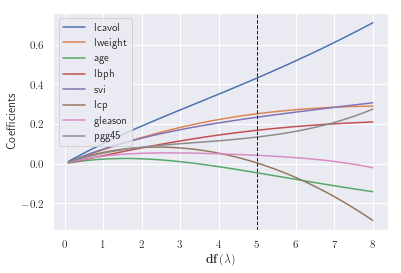

In [7]:
rc('text', usetex=True)
ax = pd.DataFrame(data=coefs, index=dfs, columns=X.columns).plot()
ax.set_xlabel(r"$\mathbf{df}(\lambda)$")
ax.set_ylabel("Coefficients")
ax.axvline(x=5.0, color='k', linestyle='--', linewidth=1);